In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline, BSpline, splrep
import random

df_s = pd.read_csv("D:\Eduson_data\ds_salaries.csv", index_col=0)

'''
Фильтрация по Маске
'''

'\nФильтрация по Маске\n'

In [2]:
# TODO START

df = pd.DataFrame({
    'A': [34, 44, 40, 20, 32, 32, 49, 44, 34, 30, 45, 48, 36, 38, 47, 27, 24, 28, 25, 46],
    'B': ['M', 'W', 'W', 'F', 'M', 'F', 'W', 'F', 'W', 'M', 'M', 'S', 'S', 'F', 'F', 'F', 'M', 'M', 'F', 'S']
})
np.random.seed(0)
ar = np.random.randint(1, 11, size=12)


In [3]:
# TODO ЗАдание масок вручную
# вывод каждого второго элемента ar (shape=12)
mask1 = [True, False, True, False, True, True, False, True, False, True, True, False]

# Вывод 2-х первых и 2-х последних значений
mask2 = [True, True, False, False, False, False, False, False, False, False, True, True] 

print(ar)
print(ar[mask1])
print(ar[mask2])


[ 6  1  4  4  8 10  4  6  3  5  8  7]
[ 6  4  8 10  6  5  8]
[6 1 8 7]


**Филтрация по nunique()**
* Отобрать бинарные признаки

In [3]:
df1 = pd.DataFrame({
    'A': [random.randint(0, 1) for i in range(5)],
    'B': list('asdfg'),
    'C': [random.randint(0, 1) for i in range(5)]
})

# Векторный вариант
mask_din = df1.nunique()

print('Векторный вариант : \n', mask_din[mask_din == 2].index,  '\n')

# Поэлементный вариант
bin = [i for i in df1.nunique().index if df1[i].nunique() == 2]

print('Поэлементный вариант : \n', bin)

Векторный вариант : 
 Index(['A', 'C'], dtype='object') 

Поэлементный вариант : 
 ['A', 'C']



 1. Фильтрация по нескольким условиям
    * Только сеньоры с зарплатой выше 100k.

In [ ]:
df_s[(df_s['salary_in_usd'] > 100000) & (df_s['experience_level'] == 'SE')]
# df_s

 2. Инверсия маски (NOT)
    * ~ это побитовая инверсия, и в контексте булевой маски она работает как "НЕ"
    *  ~mask превращает:

        * True → False

        * False → True


In [ ]:
mask = df_s['experience_level'].isin(['MI', 'SE'])
df_s[~mask]  # Все, кто НЕ MI и НЕ SE


3. Создание нового признака по условию
    * Новый столбец is_senior: True если грейд SE или TL.

In [ ]:
df_s['is_senior'] = df_s['experience_level'].isin(['SE', 'TL'])
# df_s

4. Частичная фильтрация строк по тексту
    * Строки, где в job_title встречается 'Data'.

In [ ]:
df_s[df_s['job_title'].str.contains('Data')]


 5. Где есть пропуски (NaN)
    * Строки с отсутствующей зарплатой.

In [ ]:
mask = df_s['salary_in_usd'].isna()
df_s[mask]


6. Маска по количественным условиям после группировки
    * Средняя зарплата грейдов, где > 80k.

In [ ]:
grp = df_s.groupby('experience_level')['salary_in_usd'].mean()
mask = grp > 80000
print(grp[mask])


7. 
8. Маска из .rank() или .quantile()
    * Это сравнение каждого значения с 90-м процентилем всей колонки salary_in_usd.
        * df_s['salary_in_usd'].quantile(0.9) - это значения из признака salary_in_usd соответствующиие 90 процентилю
        * df_s['salary_in_usd'] - это все значения  признака salary_in_usd

In [ ]:
mask = df_s['salary_in_usd'] > df_s['salary_in_usd'].quantile(0.9)
df_s[mask]  # Топ-10% по зарплате


8. Маска для сравнения с предыдущей строкой (сдвиг)
    * Строки, где зарплата выросла по сравнению с предыдущей.
    * Метод shift() сдвигает значения вниз по DataFrame или можно сказать берёт предыдущую строку исходного столбца

In [ ]:
df_s['salary_shift'] = df_s['salary_in_usd'].shift()
mask = df_s['salary_in_usd'] > df_s['salary_shift']
df_s[mask]


shift - Пример

In [ ]:
df = pd.DataFrame({'salary_in_usd': [1000, 1200, 1100, 1300]})
df['salary_shift'] = df['salary_in_usd'].shift()
print(df, '\n')

# TODO что бы заменить  NaN на Ноль, используем заполнение fillna
df['salary_shift'] = df['salary_in_usd'].shift().fillna(0)
print(df, '\n')

# TODO что бы заменить  NaN на последнее значение, используем заполнение iloc[-1])
df['salary_shift'] = df['salary_in_usd'].shift().fillna(df['salary_in_usd'].iloc[-1])
print(df, '\n')

Пример частичной фильтрации по тексту
* .str.contains('Data') возвращает булеву маску, где True — строки, содержащие подстроку 'Data'.

In [ ]:
import pandas as pd

# Пример DataFrame
df = pd.DataFrame({
    'job_title': ['Data Scientist', 'Data Engineer', 'Software Developer',
                  'Senior Data Scientist', 'Data Analyst']
})

# Фильтрация строк, содержащих 'Data'
mask = df['job_title'].str.contains('Data')

# Применение маски
filtered_df = df[mask]

print(filtered_df)


Булевая индексация (фильтрации) в pandas

In [ ]:


# Создаём DataFrame
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve'],
    'grade': ['MI', 'SE', 'JN', 'SE', 'TL'],
    'salary': [90000, 120000, 75000, 110000, 130000]
})

# Булевая маска: выбираем грейды только 'MI' и 'SE'
mask = df['grade'].isin(['MI', 'SE'])

# Применяем маску к df
filtered_df = df[mask]

print(filtered_df)


**Маска для ручного разделения train и test**

(100,)


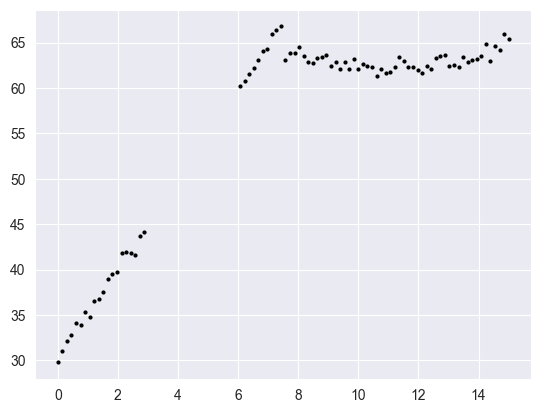

In [169]:
# TODO Маска для ручного разделения train и  test

__doc__ = '''
time, time_data  - ось Х
complex_series, series_data - ось Y
'''

#  TODO Синтезируем X
n_points = 100  # Количество данных
time = np.linspace(0, 15, n_points)  # это Х

#  TODO Создаем ряд с несколькими режимами и структурными сдвигами, подбираем что бы (regim1 + regim2 ).reshape = 100
regim1 = 30 + 5 * time[:50] + 0.1 * np.sin(time[:50] * 2) 
regim2 = regim1[-1] + (0.5 * time[30:80] - time[50]) + 2 * np.sin(time[30:80] * 0.5)
complex_series = np.concatenate([regim1, regim2])

# TODO добавляем для Y  шумы
complex_series += np.random.normal(0, 0.5, n_points)
print(complex_series.shape)

# TODO Переменные Подгоняю под учебник, time_data и series_data переданы как параметры ф-ции
time_data = time  # X
series_data = complex_series  # Y

# TODO для эмитации cross_validation
fold = int(series_data.shape[0] / 5 ) 

idx1 = fold
idx2 = fold * 2

# 🪓 TODO Создаём Маску единичный вектор
train_mask = np.ones(len(series_data), dtype=bool)

# 🪓 TODO задаём диапазон для test выборки
train_mask[idx1: idx2] = False

# ⭐ TODO отображаем через маску на train/test значения из  time_data/series_data
time_train = time_data[train_mask]
series_train = series_data[train_mask]
time_test = time_data[~train_mask]
series_test = series_data[~train_mask]



# print(time_train.sum())
# print(series_test.shape)
# print(series_data.shape)
# print(regim1.shape)
# print(regim2.shape)


series_data.shape


plt.plot(time_train, series_train, 'ko', markersize=2 )




